<a href="https://colab.research.google.com/github/SzymonJakubiak/airplane_crashes/blob/master/airplane_crashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Usefull resources
[interesting paper](https://www.irjet.net/archives/V5/i4/IRJET-V5I41086.pdf)
<br/>
[towards datascience post](https://towardsdatascience.com/a-friendly-introduction-to-text-clustering-fa996bcefd04)

## 1. Data exploration

In [1]:
!wget https://github.com/SzymonJakubiak/airplane_crashes/raw/master/crashes.csv

--2020-08-17 07:09:53--  https://github.com/SzymonJakubiak/airplane_crashes/raw/master/crashes.csv
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SzymonJakubiak/airplane_crashes/master/crashes.csv [following]
--2020-08-17 07:09:53--  https://raw.githubusercontent.com/SzymonJakubiak/airplane_crashes/master/crashes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1595468 (1.5M) [text/plain]
Saving to: ‘crashes.csv’

crashes.csv         100%[===================>]   1.52M  --.-KB/s    in 0.07s   

2020-08-17 07:09:54 (22.1 MB/s) - ‘crashes.csv’ saved [1595468/1595468]



In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('crashes.csv')

In [4]:
df["Exact_time"] = pd.to_datetime(df.Date + ' ' + df.Time, errors='coerce')
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Exact_time
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,NaT
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3049 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3562 non-null   object        
 6   Type          5241 non-null   object        
 7   Registration  4933 non-null   object        
 8   cn/In         4040 non-null   object        
 9   Aboard        5246 non-null   float64       
 10  Fatalities    5256 non-null   float64       
 11  Ground        5246 non-null   float64       
 12  Summary       4878 non-null   object        
 13  Exact_time    3037 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 576.3+ KB


In [7]:
df.Location.value_counts()

Sao Paulo, Brazil                 15
Moscow, Russia                    15
Rio de Janeiro, Brazil            14
Bogota, Colombia                  13
Anchorage, Alaska                 13
                                  ..
Bullen Point, Alaska               1
Near Auturn, France                1
Near Tamatave, Madagascar          1
Near Godstone, Surrey, England     1
Mt Lamentation, Connecticut        1
Name: Location, Length: 4303, dtype: int64

In [8]:
df.Operator.value_counts()

Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
China National Aviation Corporation     44
                                      ... 
Harbor Airlines - Air Taxi               1
Federal Airlines                         1
Ptarmigan Airways                        1
Bankair Inc. - Air Taxi                  1
Military U.S. Navy                       1
Name: Operator, Length: 2476, dtype: int64

In [16]:
df["Fatality"] = df["Fatalities"] / df["Aboard"]

In [57]:
df[df.Summary.isna()]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Exact_time,Fatality
21,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN,NaT,1.000000
23,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,1.0,0.0,NaN,NaT,1.000000
24,1919-10-02,NaN,"Newcastle, England",Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,NaN,NaN,1.0,1.0,0.0,NaN,NaT,1.000000
25,1919-10-14,NaN,"Cantonsville, Maryland",US Aerial Mail Service,NaN,NaN,Curtiss R-4LM,32,NaN,1.0,1.0,0.0,NaN,NaT,1.000000
26,1919-10-20,NaN,English Channel,Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,G-EAHG,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,1999-06-09,NaN,"Coron, Philippines",PacifiAirways,NaN,NaN,Britten-Norman BN-2A-21 Islander,RP-C471,473,1.0,1.0,0.0,NaN,NaT,1.000000
4638,1999-06-25,13:20,"Long Haul Lake, Manatoba, Canada",Blue Water Aviation Services,NaN,Test flight,de Havilland Canada DHC-3 Otter,C-FIFP,73,2.0,1.0,0.0,NaN,1999-06-25 13:20:00,0.500000
4651,1999-08-22,18:45,"Hong Kong, China",China Airlines (Taiwan),642,Bangkok - Hong Kong,McDonnell Douglas MD-11,B-150,48468/518,315.0,3.0,0.0,NaN,1999-08-22 18:45:00,0.009524
4711,2000-04-29,NaN,"Bapi, Papua New Guinea",North Coast Aviation,NaN,NaN,Britten-Norman BN-2A-20 Islander,P2-ISA,703,4.0,4.0,0.0,NaN,NaT,1.000000


In [59]:
df.fillna(value={"Summary": "unknown"}, inplace=True)

### Katastrofa w Lesie Kabackim

In [17]:
worst_polish = df[df["Date"] == np.datetime64('1987-05-09')]
worst_polish

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Exact_time,Fatality
3687,1987-05-09,11:12,"Warsaw, Poland",LOT Polish Airlines,5055,Warsaw - New York City,Ilyushin IL-62M,SP-LBG,3344942,183.0,183.0,0.0,"The No. 2 engine failed, causing an engine fir...",1987-05-09 11:12:00,1.0


In [18]:
worst_polish["Summary"].values

array(['The No. 2 engine failed, causing an engine fire, cabin decompression, damage to the  No. 1 engine, loss of  elevator control and damage to the electrical system. A fire in the cargo hold was not detected because of damage to the fire warning system. While attempting to return to Warsaw and attempting a turn to land, the aircraft crashed into a forest, 9 miles short of the runway. The cause of the engine failure was an overheated bearing. The aircraft was named Tadeusz Kosciuszko.'],
      dtype=object)

### Teneryfa

In [87]:
worst_ever = df[df["Date"] == np.datetime64('1977-03-27')]
worst_ever

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Exact_time,Fatality,clean_summary
2963,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977-03-27 17:07:00,0.90528,both aircraft were diverted to tenerife becaus...


In [91]:
worst_ever.Summary.values

array(['Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The Pan Am aircraft was named Clipper Victor. The KLM aircraft was named Rhine River.'],
      dtype=object)

## 2. NLP

In [19]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Exact_time,Fatality
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00,0.5
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00,1.0
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,NaT,1.0
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00,0.7
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00,1.0


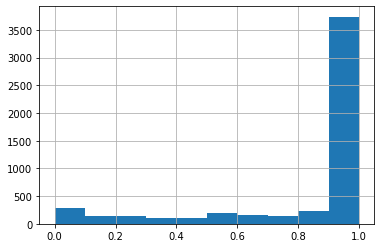

In [28]:
df.Fatality.hist()
plt.show()

### 2.1 'Summary' data cleaning

In [60]:
import re
import string

def clear_text_data(summary: str):
  """To_lowercase, cut numbers etc."""
  text = summary.lower()
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)

  return text

In [61]:
clear_text_data(df.Summary[0])

'during a demonstration flight a us army flyer flown by orville wright nosedived into the ground from a height of approximately  feet killing lt thomas e selfridge who was a passenger this was the first recorded airplane fatality in history  one of two propellers separated in flight tearing loose the wires bracing the rudder and causing the loss of control of the aircraft  orville wright suffered broken ribs pelvis and a leg  selfridge suffered a crushed skull and died a short time later'

In [71]:
df["clean_summary"] = df["Summary"].apply(clear_text_data)
df.clean_summary

0       during a demonstration flight a us army flyer ...
1       first us dirigible akron exploded just offshor...
2       the first fatal airplane accident in canada oc...
3       the airship flew into a thunderstorm and encou...
4       hydrogen gas which was being vented was sucked...
                              ...                        
5263    while on approach the military transport crash...
5264    the cargo plane crashed while on approach to i...
5265    the airbus went missing over the atlantiocean ...
5266    the air ambulance crashed into hills while att...
5267    the military transport went missing while en r...
Name: clean_summary, Length: 5268, dtype: object

### 2.2 Document-term matrix

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
data_vect = vectorizer.fit_transform(df.clean_summary)
doc_term_matrix = pd.DataFrame(data_vect.toarray(), columns=vectorizer.get_feature_names())
doc_term_matrix

,aad,aaliyah,ab,ababa,abandon,abandoned,abandoning,abandonment,abatement,abbas,abbreviation,abejorral,abide,abidjan,abilities,ability,abingdon,abkhazi,abkhazian,ablaze,able,abnormal,abnormalities,abnormally,aboard,aboout,aboriginal,abort,aborted,aborting,abrupt,abruptly,absence,abu,abuja,ac,academy,acccident,accelerate,accelerated,...,yegar,yemenite,ynez,yogyakarta,yoido,yoke,yokotsu,yongai,yopal,york,yorker,yorkthe,young,youngblood,youngest,yousef,yt,yuan,yunque,yuri,zadax,zambia,zambian,zant,zaragoza,zarate,zealand,zero,zerozero,zia,zimathan,zimbabwe,zkdqf,zlaté,zone,zones,zue,zulia,zuma,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Exploratory Data Analysis

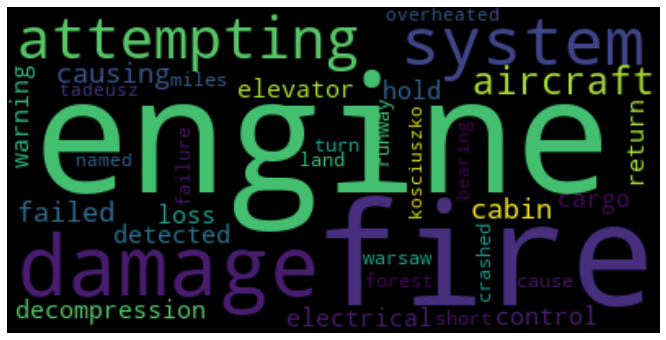

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

word_cloud = WordCloud()
word_cloud.generate(df.clean_summary[3687])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

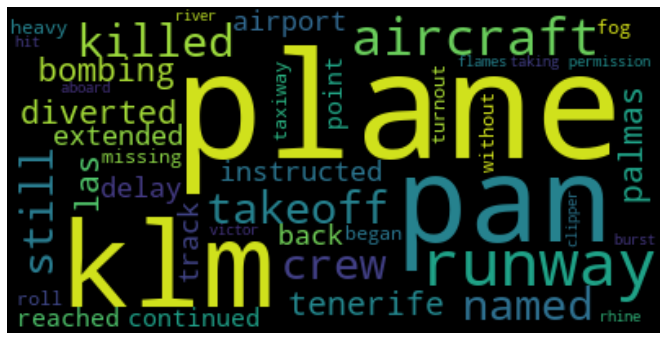

In [98]:
word_cloud.generate(df.clean_summary[2963])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

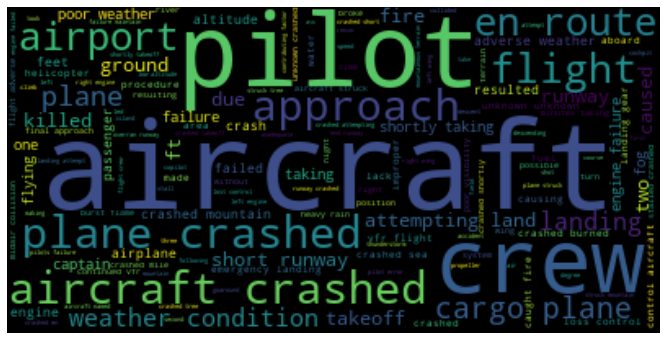

In [99]:
# all the events
summaries = ' '.join(df.clean_summary.tolist())
word_cloud.generate(summaries)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [102]:
from collections import Counter
doc_term_matrix.head(1)

,aad,aaliyah,ab,ababa,abandon,abandoned,abandoning,abandonment,abatement,abbas,abbreviation,abejorral,abide,abidjan,abilities,ability,abingdon,abkhazi,abkhazian,ablaze,able,abnormal,abnormalities,abnormally,aboard,aboout,aboriginal,abort,aborted,aborting,abrupt,abruptly,absence,abu,abuja,ac,academy,acccident,accelerate,accelerated,...,yegar,yemenite,ynez,yogyakarta,yoido,yoke,yokotsu,yongai,yopal,york,yorker,yorkthe,young,youngblood,youngest,yousef,yt,yuan,yunque,yuri,zadax,zambia,zambian,zant,zaragoza,zarate,zealand,zero,zerozero,zia,zimathan,zimbabwe,zkdqf,zlaté,zone,zones,zue,zulia,zuma,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
words_count = {}
for column in doc_term_matrix.columns:
  words_count[column] = doc_term_matrix[column].sum()
df_word_count = pd.DataFrame.from_dict(words_count, orient='index', columns=["Count"])

In [126]:
df_word_count.sort_values(by="Count", ascending=False).head(20)

,Count
crashed,3214
aircraft,2391
plane,1838
flight,1050
pilot,1016
approach,941
engine,921
runway,914
failure,878
crew,751


In [130]:
# updating stop words
from sklearn.feature_extraction import text
new_stop_words = ["crashed", "aircraft", "plane", "flight", "pilot", "crew", "en", "route"]
stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

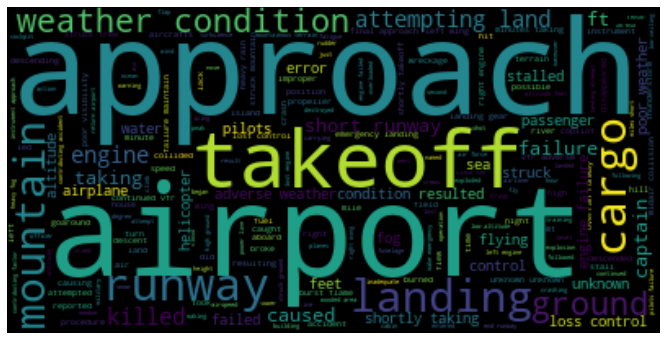

In [131]:
# all the events (filtered stop words)
summaries = ' '.join(df.clean_summary.tolist())
word_cloud = WordCloud(stopwords=stop_words)
word_cloud.generate(summaries)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### High fatality vs low fatality

In [138]:
high_fatality = df[df.Fatality > 0.9]
high_fatality.tail(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Exact_time,Fatality,clean_summary
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009-06-01 00:15:00,1.0,the airbus went missing over the atlantiocean ...
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009-06-07 08:30:00,1.0,the air ambulance crashed into hills while att...
5267,2009-06-08,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...,NaT,1.0,the military transport went missing while en r...


In [139]:
low_fatality = df[df.Fatality < 0.1]
low_fatality.tail(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Exact_time,Fatality,clean_summary
5245,2009-01-15,15:06,"New York, New York",US Airways,1549,"New York, NY- Charlotte, NC",Airbus A320-214,N106US,1044,155.0,0.0,0.0,The plane was taking off from La Guardia Airpo...,2009-01-15 15:06:00,0.000000,the plane was taking off from la guardia airpo...
5251,2009-02-25,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134.0,9.0,0.0,The plane was on final approach to Runway 18R ...,2009-02-25 10:31:00,0.067164,the plane was on final approach to runway whe...
5260,2009-04-17,15:32,"Canaima National Park, Venezuela",Aerotuy airline,NaN,Canaima - Porlamar,Cessna 208B Grand Caravan,YV-1181,208B-0695,11.0,1.0,0.0,"The plane, carrying 9 tourists, crashed 5 mile...",2009-04-17 15:32:00,0.090909,the plane carrying tourists crashed miles fr...


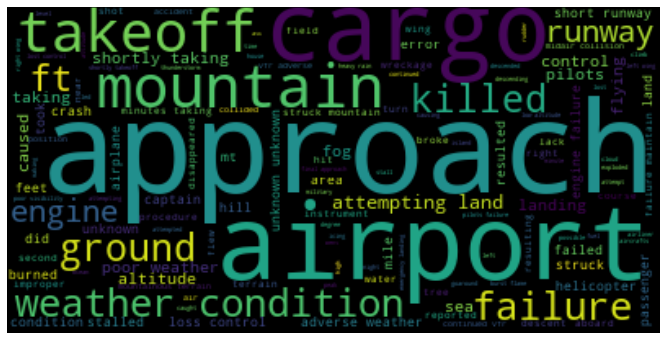

In [140]:
# high fatality
high_fatality_text = ' '.join(high_fatality.clean_summary.tolist())
word_cloud.generate(high_fatality_text)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

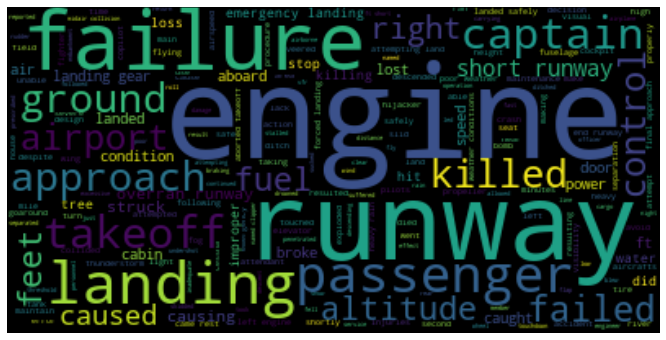

In [141]:
# low fatality
low_fatality_text = ' '.join(low_fatality.clean_summary.tolist())
word_cloud.generate(low_fatality_text)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Big plane vs small plane (possible bias from cargo planes :/ )

In [151]:
big_plane = df[df.Aboard > 150]
small_plane = df[df.Aboard < 10]
print(f"Big cont: {len(big_plane)}, Small count: {len(small_plane)}  ")

Big cont: 128, Small count: 2113  


In [152]:
def gen_word_cloud(data_frame, column_name):
  """Print a word cloud."""
  text = ' '.join(data_frame[column_name].tolist())
  word_cloud.generate(text)
  plt.imshow(word_cloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

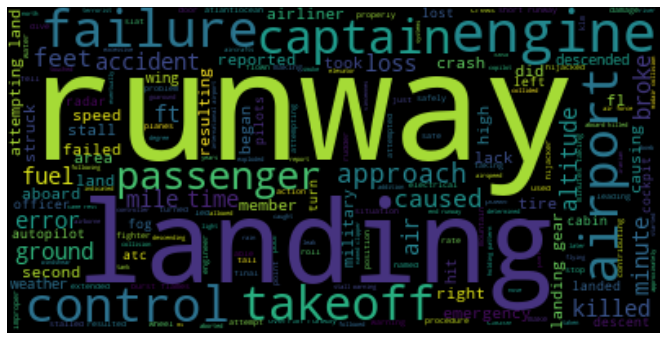

In [153]:
gen_word_cloud(big_plane, 'clean_summary')

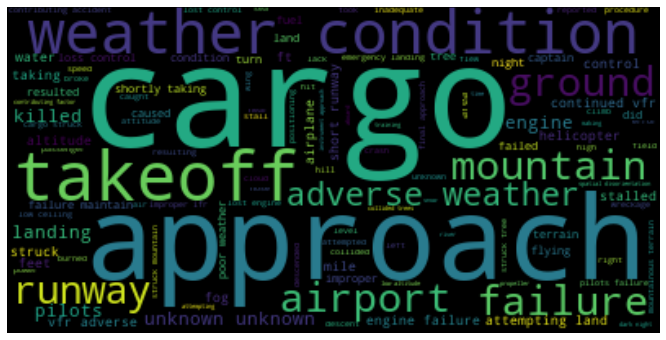

In [154]:
gen_word_cloud(small_plane, 'clean_summary')

### Let's find out more about 'cargo'

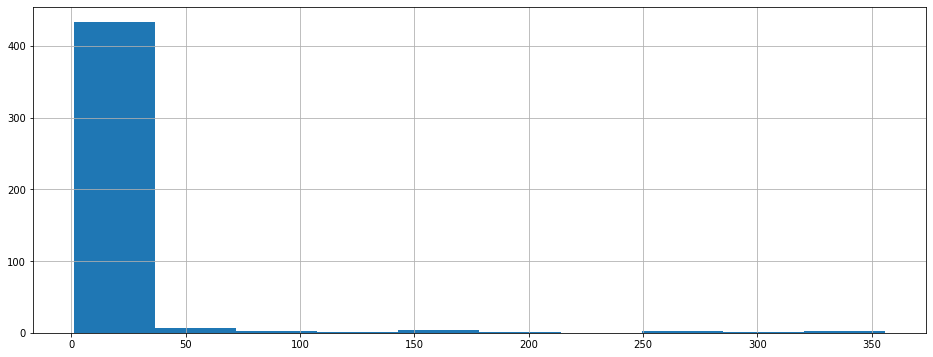

In [167]:
df_cargo = df[df.clean_summary.str.contains('cargo')]
df_cargo.Aboard.hist()
plt.show()

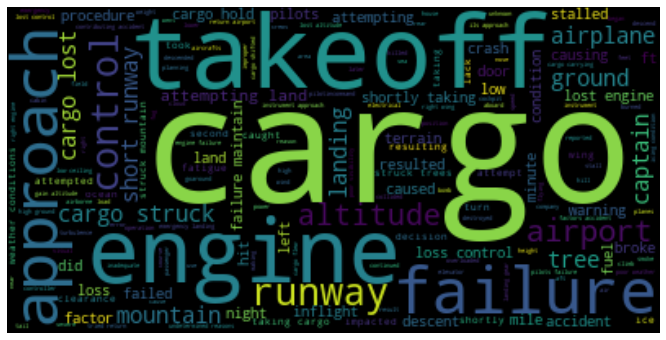

In [168]:
gen_word_cloud(df_cargo, 'clean_summary')

In [169]:
# add 'cargo' to stop words -> we want to learn more about the causes, not plane types

In [171]:
# updating stop words
new_stop_words = ["crashed", "aircraft", "plane", "flight", "pilot", "crew", "en", "route", "cargo"]
stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)
word_cloud = WordCloud(stopwords=stop_words)

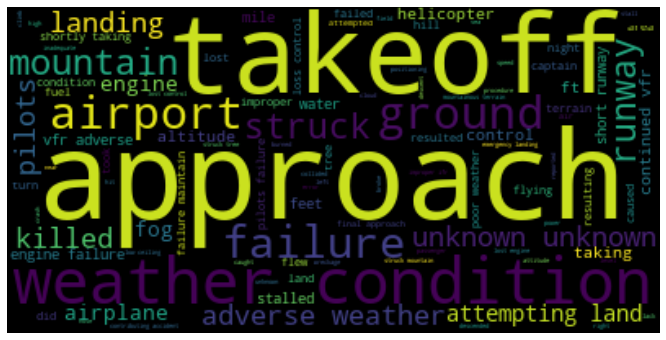

In [173]:
gen_word_cloud(small_plane, 'clean_summary')